In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier
import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [2]:
# Initialize the KNeighborsClassifier
knn_classifier = MyKNeighborsClassifier()
dummy_classifier = MyDummyClassifier()
naive_class = MyNaiveBayesClassifier()
tree_classifier = MyDecisionTreeClassifier()

## Step 0:

Preprocessing and data cleaning

In [11]:
from random import sample, seed

# Set a random seed for reproducibility
seed(42)

# Load the table from a CSV file
table = MyPyTable().csv_to_mypytable("input_file/fifa_players.csv")

# Filter out rows where the overall rating is less than 70
rating_column = table.get_column("overall_rating")
indexes_to_drop = [index for index, rating in enumerate(rating_column) if int(rating) < 70]
print(f"Rows to drop (rating < 70): {indexes_to_drop}")
print("Size before filtering: ", len(table.data))
table.drop_rows(indexes_to_drop)
print("Size after filtering: ", len(table.data))

# Remove unnecessary columns
columns_to_remove = [
    "name", "full_name", "birth_date", "age", "weight_kgs", "nationality",
    "overall_rating", "potential", "value_euro", "wage_euro", "preferred_foot",
    "international_reputation(1-5)", "weak_foot(1-5)", "body_type", "release_clause_euro",
    "national_team", "national_rating", "national_team_position", "national_jersey_number",
    "heading_accuracy", "volleys", "curve", "sprint_speed", "reactions", "balance", 
    "jumping", "strength", "aggression", "penalties", "composure", "sliding_tackle"
]
for column in columns_to_remove:
    if column in table.column_names:  # Check if column exists before removing
        table.remove_column(column)

# Discretize positions
positions = table.get_column("positions")
discretized_positions = [myutils.classify_position(position) for position in positions]
table.add_column("discretized_position", discretized_positions)
print("Discretized positions added to the table.")

# Separate data by position
goalkeepers = [row for row in table.data if row[-1] == "Goalkeeper"]
defenders = [row for row in table.data if row[-1] == "Defender"]
forwards = [row for row in table.data if row[-1] == "Forward"]
midfielders = [row for row in table.data if row[-1] == "Midfielder"]

# Downsample defenders, forwards, and midfielders to the size of goalkeepers
gk_size = len(goalkeepers)
if gk_size > 0:  # Ensure goalkeepers are not empty
    defenders_downsampled = sample(defenders, min(gk_size, len(defenders)))
    forwards_downsampled = sample(forwards, min(gk_size, len(forwards)))
    midfielders_downsampled = sample(midfielders, min(gk_size, len(midfielders)))
else:
    print("No goalkeepers found, cannot balance data.")
    defenders_downsampled, forwards_downsampled, midfielders_downsampled = [], [], []

# Combine the downsampled data
balanced_data = goalkeepers + defenders_downsampled + forwards_downsampled + midfielders_downsampled
print("Balanced data size: ", len(balanced_data))

# Update the table with the balanced data
table.data = balanced_data

# Print final table size and data
print("Final table size: ", len(table.data))
table.pretty_print()

# Print dummy classifier baseline (25%)
dummy_baseline = 0.25
print(f"Dummy classifier baseline (25%): {dummy_baseline}")

# Add a new column before extracting column indices
new_column_name = "custom_metric"
new_column_values = [row[0] * 2 for row in table.data]  # Example transformation of an existing column
if len(new_column_values) == len(table.data):  # Ensure values match the data length
    table.add_column(new_column_name, new_column_values)
else:
    print("Error: Mismatched column size for 'custom_metric'.")

# Update naive_class.header to include the new column
naive_class.header = [
    "height_cm",
    "positions",
    "skill_moves(1-5)",
    "crossing",
    "finishing",
    "short_passing",
    "dribbling",
    "freekick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "agility",
    "shot_power",
    "stamina",
    "long_shots",
    "interceptions",
    "positioning",
    "vision",
    "marking",
    "standing_tackle",
    "custom_metric"  # Include the new column
]

# Columns to include in the combined list
columns_to_include = naive_class.header

# Extract column indices and construct the combined list
column_indices = [table.column_names.index(col) for col in columns_to_include if col in table.column_names]
combined_list = [[row[idx] for idx in column_indices] for row in table.data]

# Extract the target variable
target = [row[-1] for row in balanced_data]  # Ensure target aligns with discretized_position

# Perform analysis
myutils.perform_analysis(combined_list, target, knn_classifier, dummy_classifier, naive_class, tree_classifier)

Rows to drop (rating < 70): [1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719,

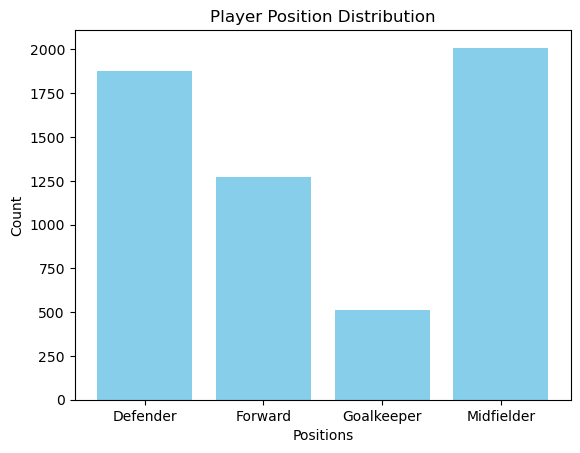

In [ ]:
import importlib
import mysklearn.plot_utils

# Reload the plot_utils module
importlib.reload(mysklearn.plot_utils)

# Assuming `discretized_positions` is already computed
# Compute the frequencies of the discretized positions
unique_positions, counts = mysklearn.plot_utils.get_frequencies(discretized_positions)

# Plot the histogram
mysklearn.plot_utils.plot_histogram(
    unique_positions, 
    counts, 
    title="Player Position Distribution", 
    xlabel="Positions", 
    ylabel="Count"
)

In [ ]:
# downsampling defender, foward, and midfiedler to size of goalkeeper
# dummy will have 25% and this is our baseline 
# seed random 
# random.sample